In [347]:
from tqdm import tqdm
from IPython.display import clear_output

import math
import matplotlib.pyplot as plt
import numpy as np

## Value Iteration

This occurs in two stages: one where you actually estimate the optimal value function and then another where you create the policy

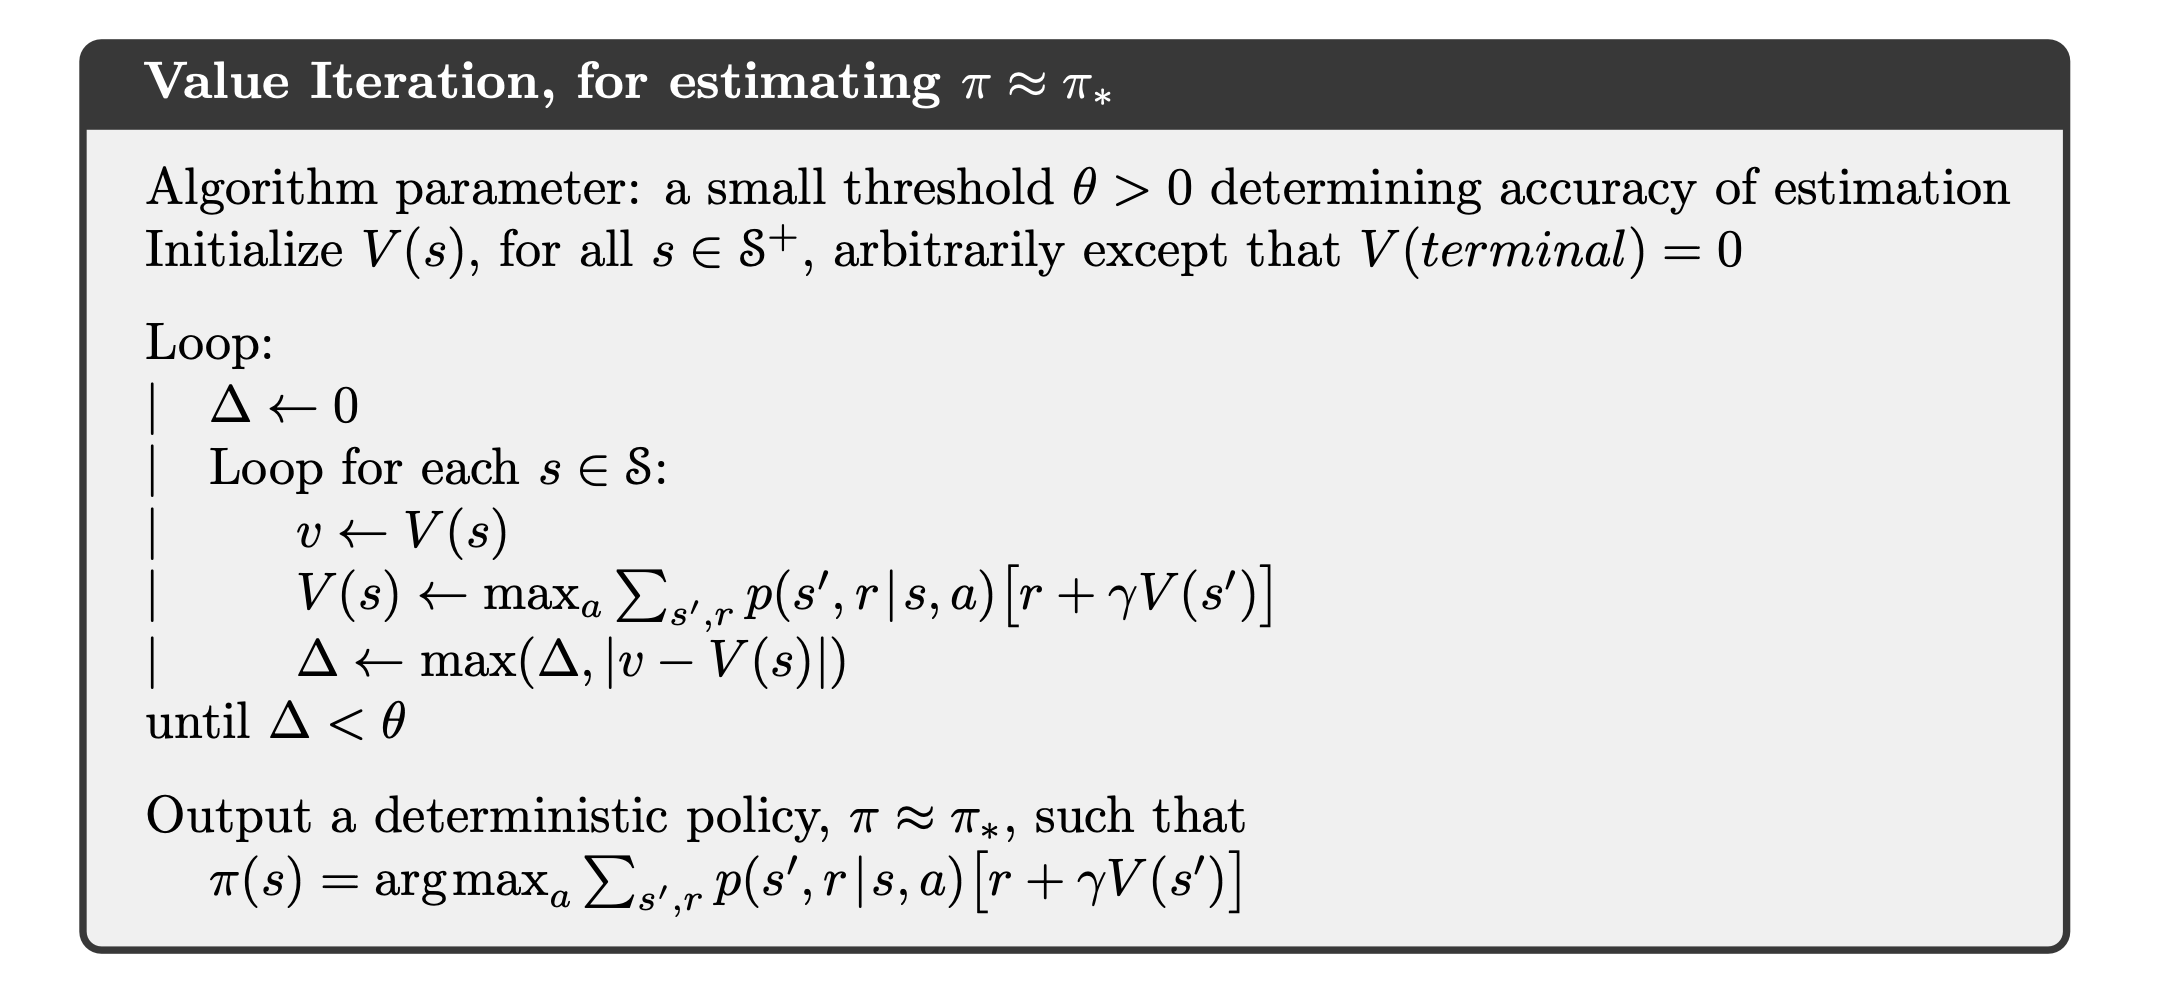
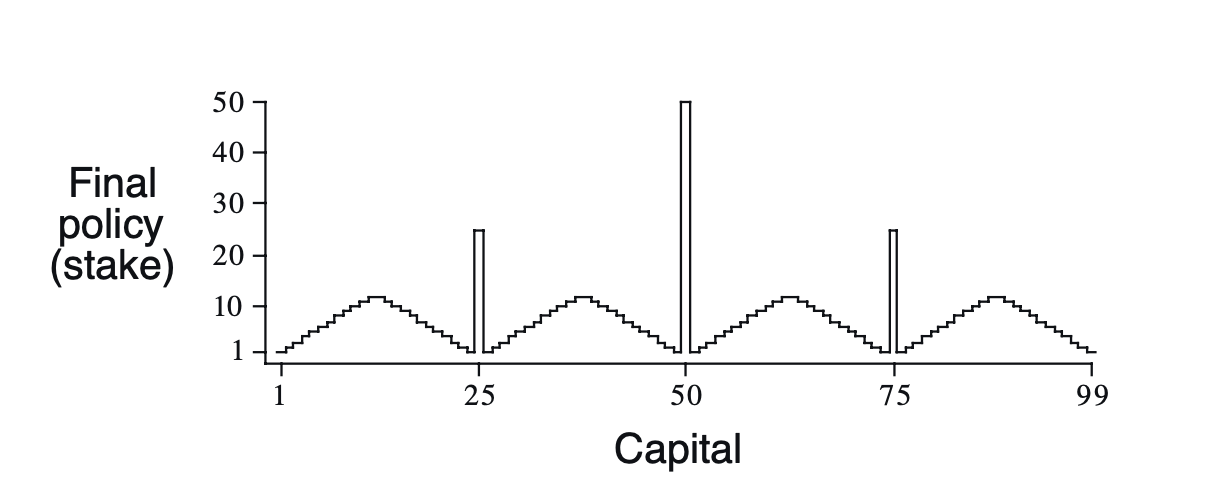

In [348]:
def calculate_p(max_capital=100, p_h = 0.5):
    # two extra states where 0 capital is 0, and 100 capital is 1
    p = {}
    for s in range(1, max_capital):
        # Bet at least 1 and at most half of total capital
        for a in range(1, min(s, max_capital-s) + 1):
            temp = {}
            reward = int((s + a) == max_capital)
            temp[(s + a, reward)] = p_h
            temp[(s - a, 0)] = 1 - p_h

            p[(s, a)] = temp

    return p

In [357]:
def value_iteration(p, max_capital=100, theta=0.001):
    # Initialize V(s), set V(terminal) = 0
    # V = np.zeros(max_capital+1)
    V = np.random.rand(max_capital+1) * 1000
    # Losing all money is 0 value, winning is 1
    # NOTE: I had a bug here, you don't need to explicitly set the value of that
    #       state to 1, since that will actually reward it like it's 2?
    V[0] = 0; V[100] = 0;
    # V[100] = 1;

    pi = np.zeros(max_capital)

    i = 0
    last_a_returns = {}
    while True:
        delta = 0

        # Loop through all non-terminal states
        for s in range(1, max_capital):
            v = V[s]

            a_returns = np.zeros(max_capital // 2 + 1)
            for a in range(1, min(s, max_capital-s) + 1):
                for (s_prime, r), prob in p[(s, a)].items():
                    # Note: gamma here is 1 since this is undiscounted
                    a_returns[a] += prob * (r + V[s_prime])
            
            last_a_returns[s] = a_returns
            V[s] = np.max(a_returns)
            pi[s] = np.argmax(a_returns)

            delta = max(delta, abs(v - V[s]))
        i += 1

        # Printing logs
        if i % 1000 == 0:
            print(f'value iter {i:6d} | delta {delta:6f}')

        # Create deterministic policy after iterations
        if delta < theta:
            for s in range(1, max_capital):

                a_returns = np.zeros(max_capital // 2 + 1)
                for a in range(1, min(s, max_capital-s) + 1):
                    for (s_prime, r), prob in p[(s, a)].items():
                        a_returns[a] += prob * (r + V[s_prime])
                pi[s] = np.argmax(a_returns)

            return (V, pi)


In [358]:
def train_loop(max_capital=100, p_h=0.5, theta=0.001):
    p = calculate_p(max_capital, p_h)
    return value_iteration(p, max_capital, theta)


In [359]:
def plot_policy(pi, max_capital=100):
    S = np.linspace(1, max_capital, num=max_capital-1)
    ax = plt.subplot()

    ax.step(S, pi[1:], color='black', linewidth=0.75)
    ax.spines[['right', 'top']].set_visible(False)
    ax.set_ybound([0, max_capital // 2])

    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.show()

In [360]:
def plot_value(V, max_capital=100):
    S = np.linspace(1, max_capital, num=max_capital-1)
    ax = plt.subplot()
    ax.spines[['right', 'top']].set_visible(False)

    ax.plot(S, V[1:max_capital], color='black')
    plt.xlabel('Capital')
    plt.ylabel('Final policy (stake)')
    plt.show()

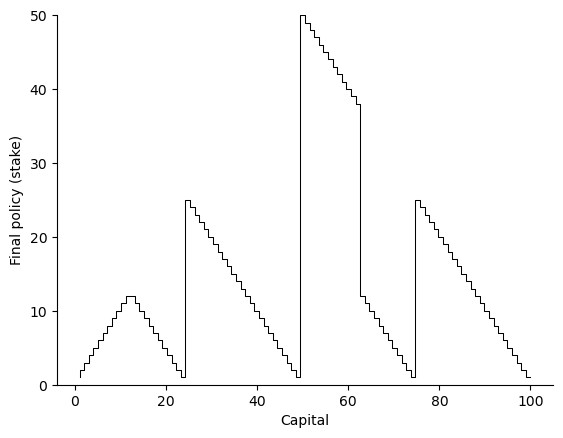

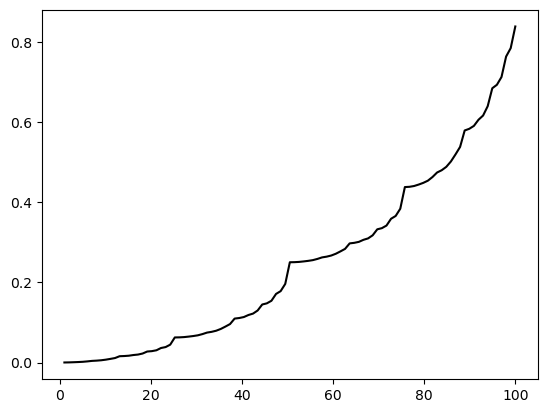

In [363]:
# CONSTANTS
P_H         = 0.25
MAX_CAPITAL = 100
THETA       = 0.00001

# Train loop
V, pi = train_loop(max_capital=MAX_CAPITAL, p_h=P_H, theta=THETA)
clear_output()
plot_policy(pi, max_capital=MAX_CAPITAL)
plot_value(V, max_capital=MAX_CAPITAL)